In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

class_models = [
    ('NaiveBayes', GaussianNB()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('DTree', DecisionTreeClassifier()),
    ('RForest', RandomForestClassifier())
]

In [2]:
pwd

'C:\\Users\\dminc'

In [3]:
cd C:\Users\dminc\Data\ML_database

C:\Users\dminc\Data\ML_database


In [4]:
# Load data
data_spx = pd.read_csv('Processed_S&P.csv')
data_russ = pd.read_csv('Processed_RUSSELL.csv')
data_ndaq = pd.read_csv('Processed_NASDAQ.csv')
data_nyse = pd.read_csv('Processed_NYSE.csv')
data_dow = pd.read_csv('Processed_DJI.csv')
data_spx.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,1115.099976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,1132.989990,0.921723,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,1136.520020,-0.375903,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,1137.140015,0.996234,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,1141.689941,0.059932,0.004001,0.000546,0.003116,0.016043,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [5]:
# Copy data
data_spx1 = data_spx.copy()
data_russ1 = data_russ.copy()
data_ndaq1 = data_ndaq.copy()
data_nyse1 = data_nyse.copy()
data_dow1 = data_dow.copy()

In [15]:
# Clean data
data_spx1.dropna(inplace = True)
data_russ1.dropna(inplace = True)
data_ndaq1.dropna(inplace = True)
data_nyse1.dropna(inplace = True)
data_dow1.dropna(inplace = True)

In [7]:
data_ndaq1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114 entries, 201 to 1923
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1114 non-null   object 
 1   Close           1114 non-null   float64
 2   Volume          1114 non-null   float64
 3   mom             1114 non-null   float64
 4   mom1            1114 non-null   float64
 5   mom2            1114 non-null   float64
 6   mom3            1114 non-null   float64
 7   ROC_5           1114 non-null   float64
 8   ROC_10          1114 non-null   float64
 9   ROC_15          1114 non-null   float64
 10  ROC_20          1114 non-null   float64
 11  EMA_10          1114 non-null   float64
 12  EMA_20          1114 non-null   float64
 13  EMA_50          1114 non-null   float64
 14  EMA_200         1114 non-null   float64
 15  DTB4WK          1114 non-null   float64
 16  DTB3            1114 non-null   float64
 17  DTB6            1114 non-null  

In [8]:
# Datetime index
data_spx1 = data_spx1.set_index('Date')
data_russ1 = data_russ1.set_index('Date')
data_ndaq1 = data_ndaq1.set_index('Date')
data_nyse1 = data_nyse1.set_index('Date')
data_dow1 = data_dow1.set_index('Date')

In [9]:
# Drop exchange name column
data_spx1.drop(['Name'], axis=1, inplace = True)
data_russ1.drop(['Name'], axis=1, inplace = True)
data_ndaq1.drop(['Name'], axis=1, inplace = True)
data_nyse1.drop(['Name'], axis=1, inplace = True)
data_dow1.drop(['Name'], axis=1, inplace = True)

In [10]:
# Compute log return
data_spx1['Return'] = np.log(data_spx1.Close) - np.log(data_spx1.Close.shift(1))
data_russ1['Return'] = np.log(data_russ1.Close) - np.log(data_russ1.Close.shift(1))
data_ndaq1['Return'] = np.log(data_ndaq1.Close) - np.log(data_ndaq1.Close.shift(1))
data_nyse1['Return'] = np.log(data_nyse1.Close) - np.log(data_nyse1.Close.shift(1))
data_dow1['Return'] = np.log(data_dow1.Close) - np.log(data_dow1.Close.shift(1))

In [11]:
# Binary classification - daily returns
data_spx1.loc[data_spx1['Return'] > 0, 'Class'] = 1
data_spx1.loc[data_spx1['Return'] <= 0, 'Class'] = 0
data_russ1.loc[data_russ1['Return'] > 0, 'Class'] = 1
data_russ1.loc[data_russ1['Return'] <= 0, 'Class'] = 0
data_ndaq1.loc[data_ndaq1['Return'] > 0, 'Class'] = 1
data_ndaq1.loc[data_ndaq1['Return'] <= 0, 'Class'] = 0
data_nyse1.loc[data_nyse1['Return'] > 0, 'Class'] = 1
data_nyse1.loc[data_nyse1['Return'] <= 0, 'Class'] = 0
data_dow1.loc[data_dow1['Return'] > 0, 'Class'] = 1
data_dow1.loc[data_dow1['Return'] <= 0, 'Class'] = 0
# clean NaN again

In [16]:
# Compare
from sklearn.model_selection import cross_val_score

for dataset_name, dataset in [('S&P500', data_spx1),
                             ('RUSSELL', data_russ1),
                             ('NASDAQ', data_ndaq1),
                             ('NYSE', data_nyse1),
                             ('DJIA', data_dow1)]:
    
    X = dataset.loc[:, dataset.columns != 'Class']
    y = dataset['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.3,
                                                        random_state = 42)
    for name, model in class_models:
        mod = model
        mod.fit(X_train, y_train)
        accuracy = mod.score(X_test, y_test)
        n = 5
        kfold = model_selection.KFold(n_splits = n, 
                                      shuffle = True,
                                      random_state = None)
        cv_result = cross_val_score(mod, X, y, 
                                    cv = kfold, 
                                    scoring = 'accuracy')
        print(dataset_name, name, 'test_accuracy =', accuracy)
        print('CV random: ', cv_result)
        print('CV avg.: ', np.sum(cv_result) / n)
    print("")

S&P500 NaiveBayes test_accuracy = 0.8323353293413174
CV random:  [0.8206278  0.85201794 0.8206278  0.85585586 0.83333333]
CV avg.:  0.8364925463580173
S&P500 SVM test_accuracy = 0.5778443113772455
CV random:  [0.55156951 0.56950673 0.58744395 0.51801802 0.55855856]
CV avg.:  0.5570193511897549
S&P500 KNN test_accuracy = 0.5718562874251497
CV random:  [0.57399103 0.60089686 0.55156951 0.58558559 0.53153153]
CV avg.:  0.5687149032440512
S&P500 DTree test_accuracy = 1.0
CV random:  [0.9955157 1.        1.        1.        1.       ]
CV avg.:  0.9991031390134528
S&P500 RForest test_accuracy = 0.9820359281437125
CV random:  [0.9955157  0.9955157  0.9955157  0.98648649 0.9954955 ]
CV avg.:  0.9937058134367552

RUSSELL NaiveBayes test_accuracy = 0.8083832335329342
CV random:  [0.8206278  0.79372197 0.81165919 0.86486486 0.85135135]
CV avg.:  0.8284450369652163
RUSSELL SVM test_accuracy = 0.5658682634730539
CV random:  [0.56502242 0.56950673 0.53811659 0.56306306 0.5       ]
CV avg.:  0.547141

Confusion matrix: 
 [[145   1]
 [  0 188]]
Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       146
         1.0       0.99      1.00      1.00       188

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



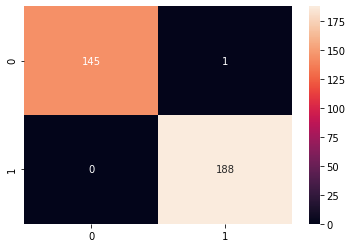

In [17]:
# Random forest - F1 Score
# data_dow1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 4)
rf = RandomForestClassifier(random_state = None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)
print('Classification report: \n', classification_report(y_test, y_pred))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

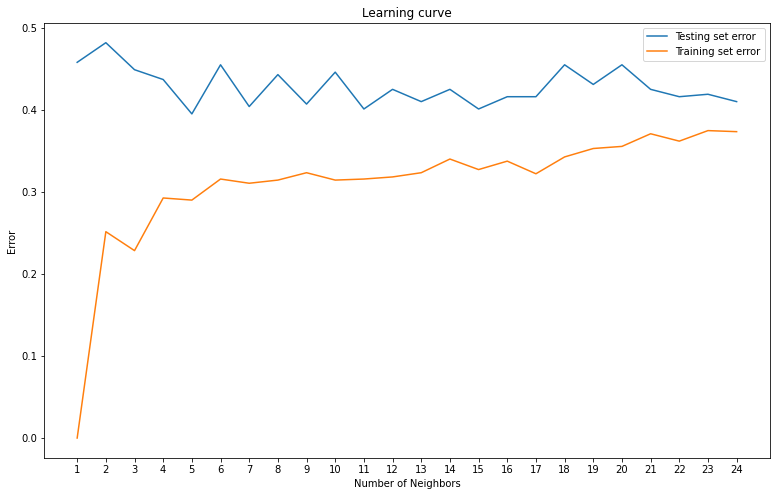

Lowest error is 0.39520958083832336 with K = 5


In [18]:
# Improve KNN
# data_dow1
a = range(1, 25)
train_accuracy = []
test_accuracy = []

for k in iter(a):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy.append(1-knn.score(X_train, y_train))
    test_accuracy.append(1-knn.score(X_test, y_test))
    
plt.figure(figsize = [13, 8])
plt.plot(a, test_accuracy, label = 'Testing set error')
plt.plot(a, train_accuracy, label = 'Training set error')
plt.legend()
plt.title('Learning curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(a)
plt.savefig('learningK.png')
plt.show()
print("Lowest error is {} with K = {}".format(np.min(test_accuracy), 
                                        1+test_accuracy.index(np.min(test_accuracy))))
                         

In [19]:
data_spx1.loc[:,['Close', 'Return', 'Class']]

,Close,Return,Class
Date,,,
2010-10-20,1178.170044,0.010469,1.0
2010-10-21,1180.260010,0.001772,1.0
2010-10-26,1185.640015,0.004548,1.0
2010-10-27,1182.449951,-0.002694,0.0
2010-10-28,1183.780029,0.001124,1.0
...,...,...,...
2017-08-09,2474.020020,-0.000364,0.0
2017-08-10,2438.209961,-0.014580,0.0
2017-08-16,2468.110107,0.012189,1.0
